In [1]:
# Import necessary libraries and packages
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read csv
df = pd.read_csv('churn_clean.csv')

In [5]:
# Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [7]:
# Treat missing values in 'internetservice'
df['InternetService'] = df['InternetService'].fillna(value="None")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [11]:
# Create cross-tabulation table
# Code based on GeeksforGeeks. (n.d.). Pandas crosstab() function in Python.
# Retrieved from https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/ 
contingency = pd.crosstab(df['Contract'], df['Churn'])
print(contingency)

Churn             No   Yes
Contract                  
Month-to-month  3422  2034
One year        1795   307
Two Year        2133   309


In [13]:
# Perform chi-square test
# Code based on Dhunna, A. (2020, October 20). How to run Chi-Square Test in Python.
# Retrieved from https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val:.5f}")
print(f"Expected Frequency: {expected}")

Chi-Square Statistic: 718.5915805949758
P-value: 0.00000
Expected Frequency: [[4010.16 1445.84]
 [1544.97  557.03]
 [1794.87  647.13]]


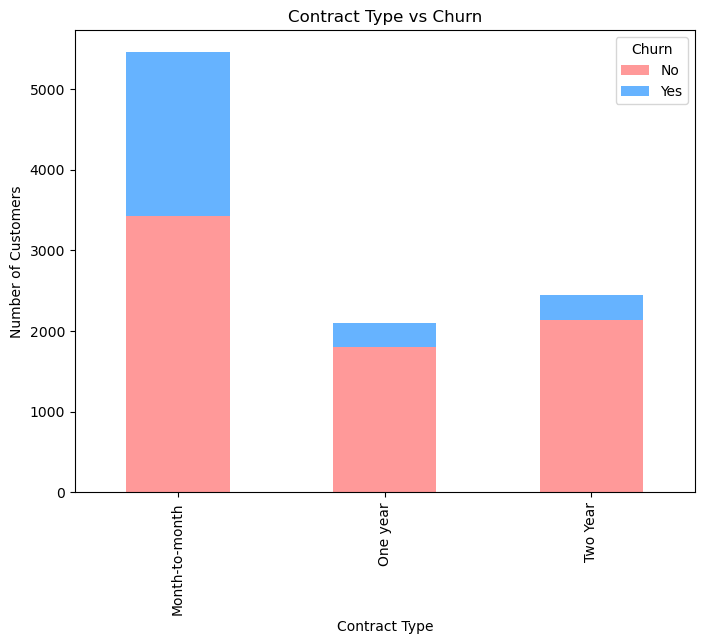

In [15]:
# Visualize Contract vs Churn

# Create stacked bar chart
contingency.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#ff9999','#66b3ff'])

# Add labels and title
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

In [17]:
# Descriptive statistics for continuous variables
print(df['Income'].describe())

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64


In [19]:
print(df['MonthlyCharge'].describe())

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


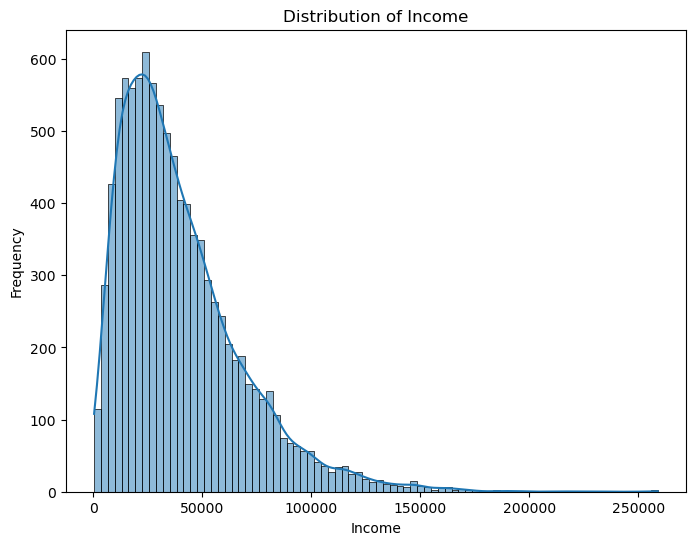

In [21]:
# Visualize distribution of Income
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], kde=True) 
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


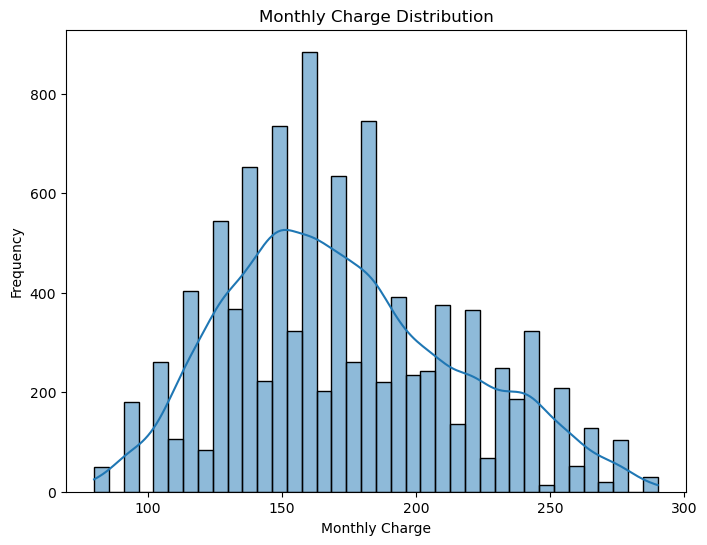

In [23]:
# Visualize distribution of MonthlyCharge
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharge'], kde=True)
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Get value counts for Gender
print(df['Gender'].value_counts())

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64


In [27]:
# Get value counts for Techie
print(df['Techie'].value_counts())

Techie
No     8321
Yes    1679
Name: count, dtype: int64


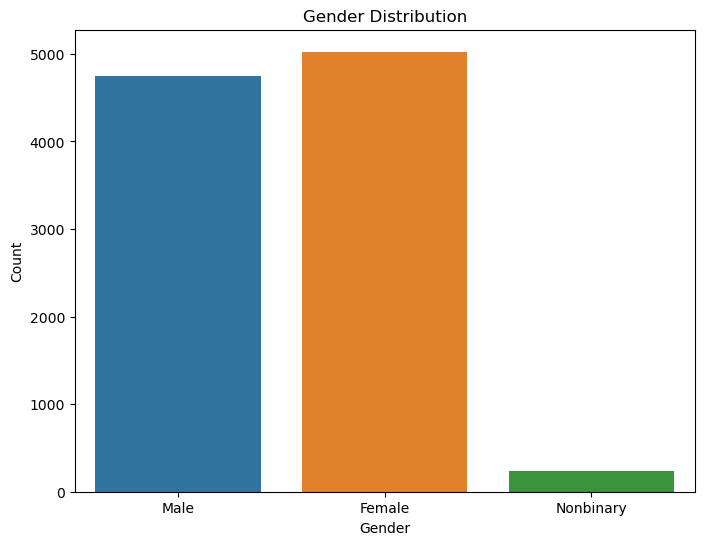

In [29]:
# Visualize distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

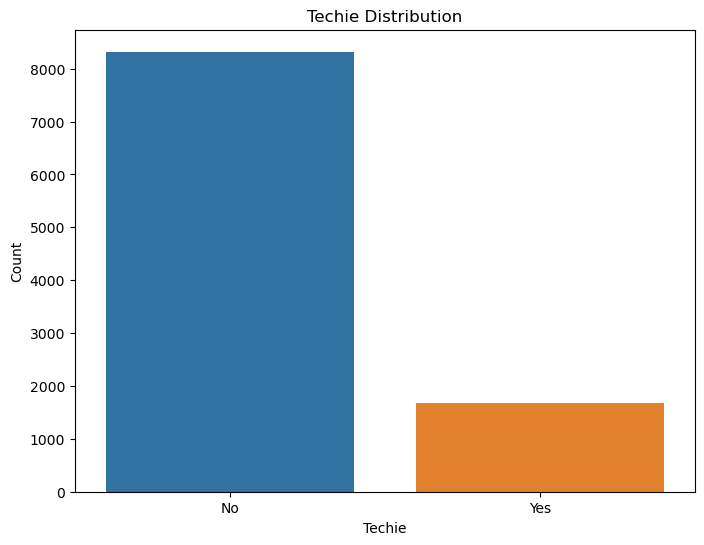

In [31]:
# Visualize distribution of Techie
plt.figure(figsize=(8, 6))
sns.countplot(x='Techie', data=df)
plt.title('Techie Distribution')
plt.xlabel('Techie')
plt.ylabel('Count')
plt.show()

In [33]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between Income and Monthly Charge
# Code based on GeeksforGeeks. (n.d.). Python Pearson correlation test between two variables.
# Retrieved from https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/
corr, _ = pearsonr(df['Income'], df['MonthlyCharge'])
print(f"Correlation between Income and Monthly Charges: {corr}")

Correlation between Income and Monthly Charges: -0.0030139649834786623


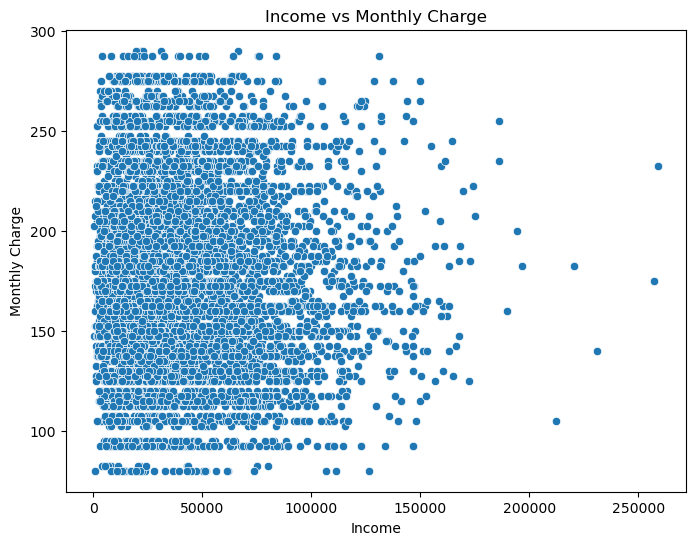

In [35]:
# Scatter plot for Income vs. Monthly Charge
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MonthlyCharge', data=df)
plt.title('Income vs Monthly Charge')
plt.xlabel('Income')
plt.ylabel('Monthly Charge')
plt.show()

In [37]:
# Cross-tabulation of Gender and Techie
# Code based on GeeksforGeeks. (n.d.). Pandas crosstab() function in Python.
# Retrieved from https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/ 
gender_techie = pd.crosstab(df['Gender'], df['Techie'])

# Display the table
print(gender_techie)

Techie       No  Yes
Gender              
Female     4157  868
Male       3966  778
Nonbinary   198   33


In [39]:
# Perform chi-square test on Gender vs Techie
# Code based on Dhunna, A. (2020, October 20). How to run Chi-Square Test in Python.
# Retrieved from https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d
chi2_stat, p_val, dof, expected = chi2_contingency(gender_techie)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_val}")

Chi-Square Statistic: 2.3955846292159864, P-value: 0.30185988850587486


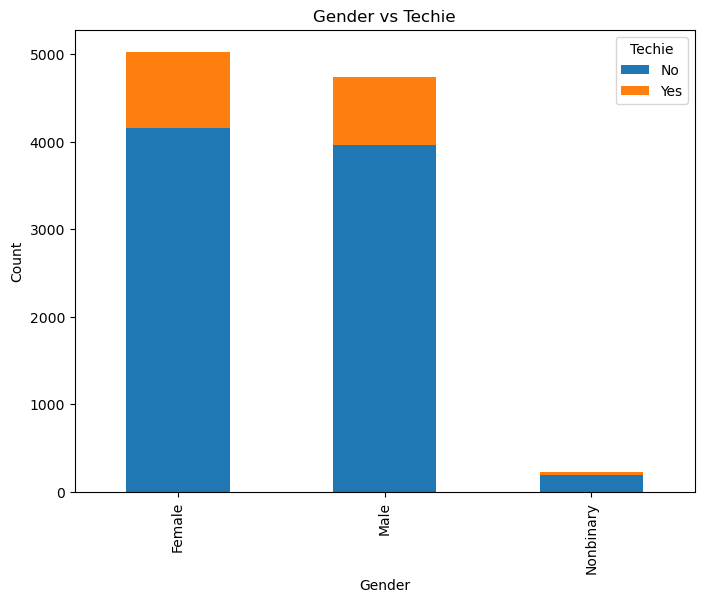

In [41]:
# Stacked bar chart for Gender and Techie
gender_techie.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Gender vs Techie')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Techie')
plt.show()